In [1]:
#Importing the libraries that would be used to train the model, since we are using a cloud based IDE we don't need to download the libraries.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os


In [2]:
#This is for calling the dataset that would be used to train the model. Adding the necessary conditions.

def load_data(df):
    """Loads images and labels from the specified directory."""
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    X = []
    y = []
    classes = os.listdir(df)
    for label, disease in enumerate(classes):
        disease_dir = os.path.join(df, disease)
        for img_file in os.listdir(disease_dir):
            img_path = os.path.join(disease_dir, img_file)
            img = load_img(img_path, target_size=(128, 128))  # Resize all images to 128x128
            img_array = img_to_array(img) / 255.0  # Normalize to [0,1]
            X.append(img_array)
            y.append(label)
    return np.array(X), np.array(y), classes

In [3]:
#The link to where the dataset is located.
df = '/content/drive/MyDrive/Maize disease/Maize Leaf Dataset'  # Update this with the correct path
X, y, class_names = load_data(df)

In [4]:
#The splitting of the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 3: CNN Model. We are setting the model up for training here.
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(class_names), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Instantiate and train the model
cnn_model = create_cnn_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Still part of the training.
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


In [8]:
#This is where the epochs will show and you will be able to get the metric, that is accuracy, precision and other metrics.
history = cnn_model.fit(train_generator, validation_data=(X_test, y_test), epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.6011 - loss: 0.8498 - val_accuracy: 0.8622 - val_loss: 0.3323
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.8443 - loss: 0.3751 - val_accuracy: 0.9352 - val_loss: 0.1913
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8865 - loss: 0.3002 - val_accuracy: 0.8677 - val_loss: 0.3409
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9084 - loss: 0.2278 - val_accuracy: 0.9379 - val_loss: 0.1679
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.9274 - loss: 0.2054 - val_accuracy: 0.9570 - val_loss: 0.1129
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.9339 - loss: 0.1910 - val_accuracy: 0.9563 - val_loss: 0.1164
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9294 - loss: 0.1971 - val_accuracy: 0.9202 - val_loss: 0.1892
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9263 - loss: 0.2001 - val_accu

In [9]:
cnn_eval = cnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {cnn_eval[0]}, Test Accuracy: {cnn_eval[1]}")
#Still the metrics

46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.9637 - loss: 0.1051
Test Loss: 0.10485807806253433, Test Accuracy: 0.9577080607414246


In [10]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

#Classification report on the model, that is overview of the metrics of the model .

46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step
Classification Report:
                      precision    recall  f1-score   support

             Healthy       1.00      0.99      0.99       398
Northern Leaf Blight       0.89      0.97      0.93       373
         Common Rust       1.00      0.99      0.99       368
      Gray Leaf Spot       0.95      0.87      0.91       327

            accuracy                           0.96      1466
           macro avg       0.96      0.95      0.96      1466
        weighted avg       0.96      0.96      0.96      1466



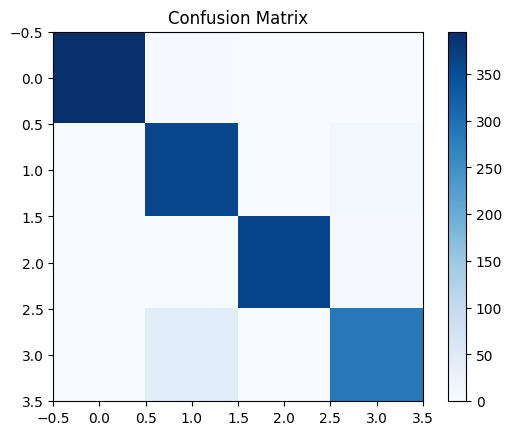

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


In [12]:
# Flatten the images for SVM input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
#Now we want to start training svm

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

#Just like we did for cnn, we are going to split and then flatten the dataset so that svm would be able to train on it.

In [14]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_flat, y_train)

#SVM training.

SVC(C=1)

In [15]:
# Step 7: Evaluate SVM Model
y_pred_svm = svm_model.predict(X_test_flat)
#Still training

In [16]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))
#Classification report

SVM Classification Report:
                      precision    recall  f1-score   support

             Healthy       0.99      0.99      0.99       398
Northern Leaf Blight       0.83      0.96      0.89       373
         Common Rust       0.98      0.99      0.99       368
      Gray Leaf Spot       0.95      0.78      0.86       327

            accuracy                           0.93      1466
           macro avg       0.94      0.93      0.93      1466
        weighted avg       0.94      0.93      0.93      1466



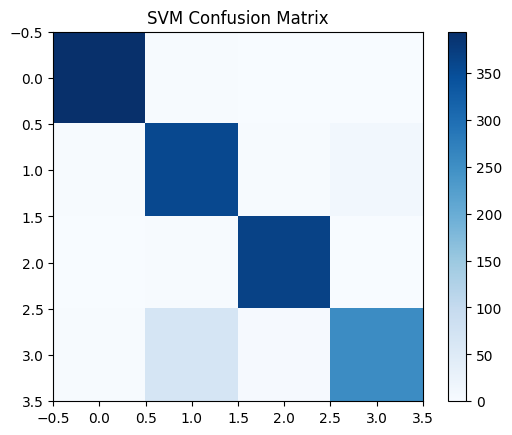

In [17]:
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.imshow(svm_conf_matrix, cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.colorbar()
plt.show()

CNN Accuracy: 0.9577
SVM Accuracy: 0.9345


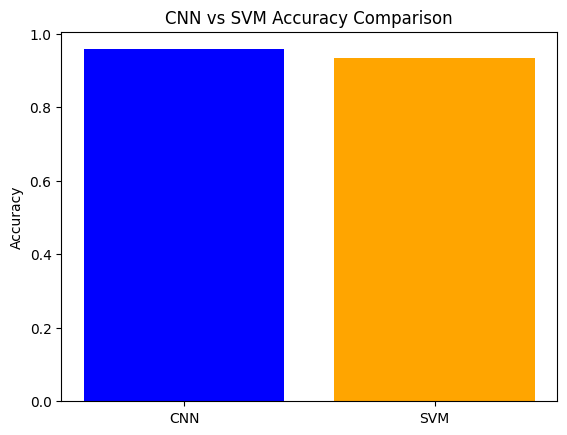

In [18]:
# Collecting evaluation metrics for comparison
from sklearn.metrics import accuracy_score

# Accuracy
cnn_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Plotting comparison
plt.bar(['CNN', 'SVM'], [cnn_accuracy, svm_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('CNN vs SVM Accuracy Comparison')
plt.show()


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cnn_accuracy = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, average='weighted')
cnn_recall = recall_score(y_test, y_pred, average='weighted')
cnn_f1 = f1_score(y_test, y_pred, average='weighted')


In [20]:
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"CNN Precision: {cnn_precision:.4f}")
print(f"CNN Recall: {cnn_recall:.4f}")
print(f"CNN F1 Score: {cnn_f1:.4f}")

CNN Accuracy: 0.9577
CNN Precision: 0.9594
CNN Recall: 0.9577
CNN F1 Score: 0.9577


In [21]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')


In [22]:
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")
print(f"SVM F1 Score: {svm_f1:.4f}")

SVM Accuracy: 0.9345
SVM Precision: 0.9390
SVM Recall: 0.9345
SVM F1 Score: 0.9337


In [23]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cnn_scores = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

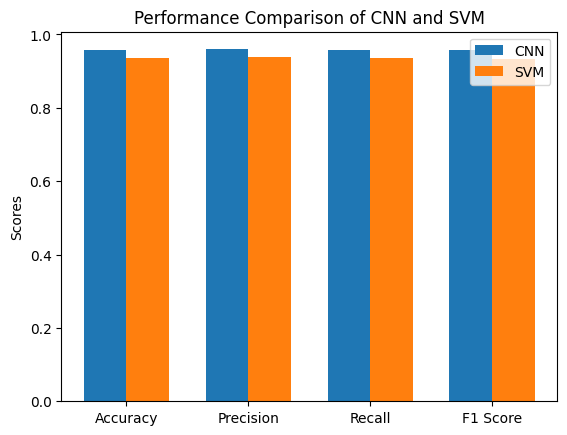

In [24]:
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cnn_scores, width, label='CNN')
rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of CNN and SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

#Everything has been about the evaluation metrics from where i stopped commenting.

In [26]:
cnn_model.save('cnn_model.h5')  # Save the trained CNN model


In [27]:
cnn_model.save(os.path.join('/content/drive/MyDrive/Maize disease' 'cnn_model.h5'))
#Now, I'm saving the models. I'm using h5 because i would be able to link it to the app i want to create easily.

In [28]:
import joblib
joblib.dump(svm_model, os.path.join('/content/drive/MyDrive/Maize disease' 'svm_model.pkl'))
#Same thing for this too.

['/content/drive/MyDrive/Maize diseasesvm_model.pkl']